<a href="https://colab.research.google.com/github/fredyssimanca/OIMIAR_Python/blob/main/Algoritmos_R2_Fredys_Simanca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Reto 2

Nombre: Fredys Alberto Simanca Herrera <br>
Github: <br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

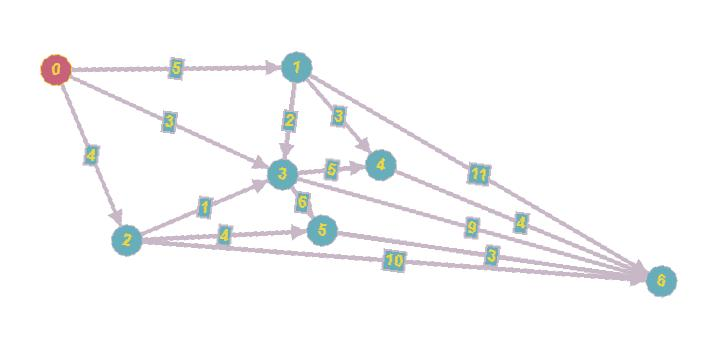

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [51]:
#Viaje por el rio - Programación dinámica
################################################################################
#Para resolver este problema se usará el algoritmo de Floyd-Warshall (https://medium.com/algoritmo-floyd-warshall/algoritmo-de-floyd-warshall-e1fd1a900d8).
#Este algoritmo es ideal para encontrar los caminos más baratos para este caso.

def descenso_rio(n, precios):
    # Inicializamos la matriz de precios (7x7)
    costos = [[float('inf')] * n for _ in range(n)]

    # Llenamos la matriz con los precios
    for i in range(n):
        for j in range(i+1, n):
            costos[i][j] = precios[i][j]

    # Algoritmo de Floyd-Warshall, este es un algoritmo de programación dinámica
    # Adaptado de--> https://medium.com/algoritmo-floyd-warshall/algoritmo-de-floyd-warshall-e1fd1a900d8
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if costos[i][j] > costos[i][k] + costos[k][j]:
                    costos[i][j] = costos[i][k] + costos[k][j]

    return costos

In [52]:
#Definimos el número de embarcaderos en 7
n = 7
precios = [[0] * n for _ in range(n)]
#Generaremos los precios de la matriz aleatorio, de esa manera cada ejecución da
#resultados distintos
import random
for i in range(n):
    for j in range(i+1, n):
        precios[i][j] = random.randint(1, 20)

# Imprimir la matriz de precios
print("Matriz de precios:")
for fila in precios:
    print(fila)

Matriz de precios:
[0, 13, 8, 19, 13, 1, 12]
[0, 0, 18, 13, 2, 11, 19]
[0, 0, 0, 16, 17, 14, 20]
[0, 0, 0, 0, 7, 9, 12]
[0, 0, 0, 0, 0, 18, 8]
[0, 0, 0, 0, 0, 0, 6]
[0, 0, 0, 0, 0, 0, 0]


In [53]:
resultado = descenso_rio(n, precios)

# Imprimir los resultados
print("Costos mínimos entre embarcaderos:")
for i in range(n):
    for j in range(i+1, n):
        print(f"De {i} a {j}: {resultado[i][j]}")

Costos mínimos entre embarcaderos:
De 0 a 1: 13
De 0 a 2: 8
De 0 a 3: 19
De 0 a 4: 13
De 0 a 5: 1
De 0 a 6: 7
De 1 a 2: 18
De 1 a 3: 13
De 1 a 4: 2
De 1 a 5: 11
De 1 a 6: 10
De 2 a 3: 16
De 2 a 4: 17
De 2 a 5: 14
De 2 a 6: 20
De 3 a 4: 7
De 3 a 5: 9
De 3 a 6: 12
De 4 a 5: 18
De 4 a 6: 8
De 5 a 6: 6


## Descenso del gradiente

In [54]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [55]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

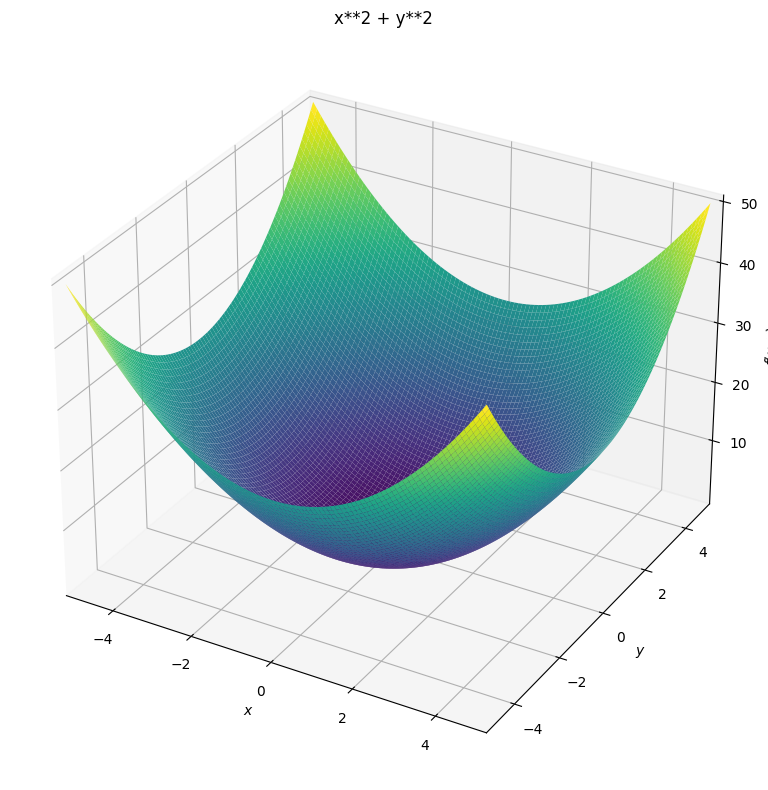

In [56]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(8,8))

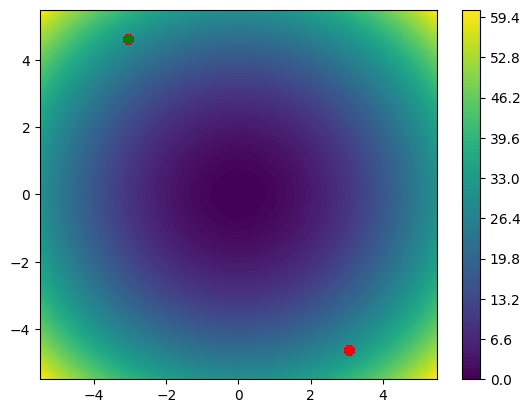

Solucion: [-3.0634749991228993, 4.6296715823299515] 30.81873803048456


In [57]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
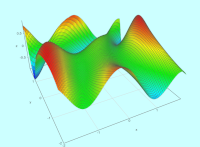


In [58]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Definimos la funcion, haremos un cambio para incluirla dentro de una función

def f(x, y):
  #f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
  return np.sin(1/2 * x**2 - 1/4 * y**2 + 3) *np.cos(2*x + 1 - np.exp(y))

# Derivadas parciales
def df_dx(x, y):
    return (x * np.cos(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2*x + 1 - np.exp(y)) -
            2 * np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.sin(2*x + 1 - np.exp(y)))

def df_dy(x, y):
    return (-1/2 * y * np.cos(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2*x + 1 - np.exp(y)) +
            np.exp(y) * np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.sin(2*x + 1 - np.exp(y)))

In [59]:
# Algoritmo de descenso del gradiente
def gradient_descent(x0, y0, learning_rate, num_iterations):
    x, y = x0, y0
    trajectory = [(x, y)]
    for _ in range(num_iterations):
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        trajectory.append((x, y))
    return np.array(trajectory)

In [60]:
# Parámetros
x0, y0 = 0, 0
learning_rate = 0.01
num_iterations = 1000

# Ejecutar el descenso del gradiente
trayecto = gradient_descent(x0, y0, learning_rate, num_iterations)

In [61]:
# Creamos la malla para la visualización
resolucion = 100
rango=5.5

x=np.linspace(-rango,rango,resolucion)
y=np.linspace(-rango,rango,resolucion)


X, Y = np.meshgrid(x, y)
Z = f(X, Y)

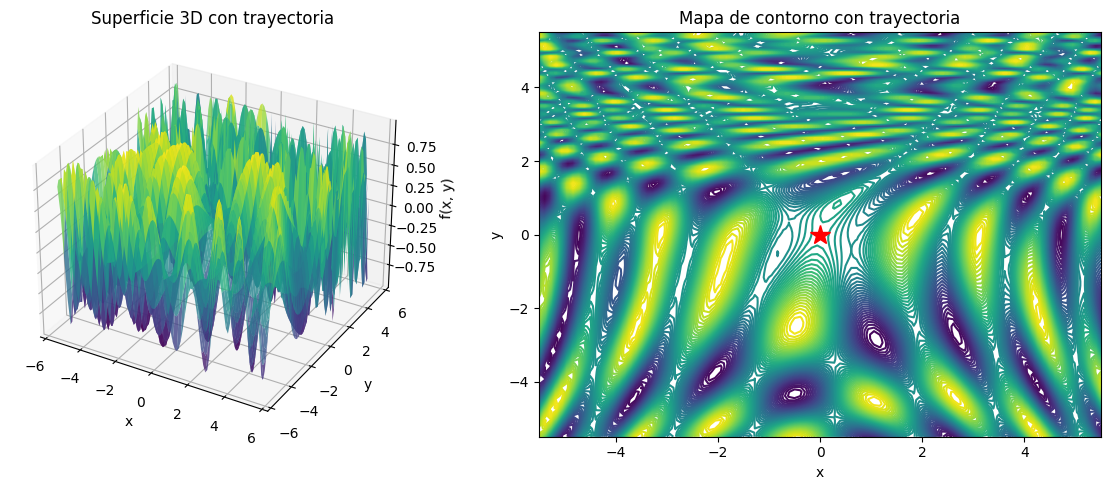

In [62]:
# Visualización
fig = plt.figure(figsize=(12, 5))

# Gráfico 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.plot(trayecto[:, 0], trayecto[:, 1], f(trayecto[:, 0], trayecto[:, 1]), 'r-', linewidth=2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Superficie 3D con trayectoria')

# Gráfico de contorno
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, levels=50)
ax2.plot(trayecto[:, 0], trayecto[:, 1], 'r-', linewidth=2)
ax2.plot(trayecto[-1, 0], trayecto[-1, 1], 'r*', markersize=15)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Mapa de contorno con trayectoria')

plt.tight_layout()
plt.show()

In [63]:

# Imprimimos el resultado final
print(f"Mínimo encontrado en: x = {trayecto[-1, 0]:.4f}, y = {trayecto[-1, 1]:.4f}")
print(f"Valor de la función en el mínimo: {f(trayecto[-1, 0], trayecto[-1, 1]):.4f}")

Mínimo encontrado en: x = 0.0000, y = 0.0000
Valor de la función en el mínimo: 0.1411
